# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan dalam proyek ini adalah dataset kampanye pemasaran yang berisi informasi tentang pelanggan, termasuk demografi, perilaku belanja, dan interaksi produk. Dataset ini diambil dari sumber publik dan tidak memiliki label atau kelas, sehingga cocok untuk analisis clustering.

**Langkah-langkah yang akan dilakukan pada dataset ini**:

1. **Import Library**: Mengimpor pustaka Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.
2. **Memuat Dataset**: Memuat dataset ke dalam lingkungan kerja dan menampilkan beberapa baris pertama untuk memahami struktur data.
3. **Exploratory Data Analysis (EDA)**: Melakukan analisis data eksploratif untuk memahami distribusi data, menangani nilai yang hilang, dan visualisasi korelasi antar variabel.
4. **Data Preprocessing**: Melakukan preprocessing data termasuk normalisasi fitur numerik dan encoding data kategorikal.
5. **Pembangunan Model Clustering**:
   - **a. Pembangunan Model Clustering**: Menggunakan algoritma K-Means untuk melakukan clustering pada data.
   - **b. Evaluasi Model Clustering**: Mengevaluasi kualitas cluster yang terbentuk menggunakan Silhouette Score.
   - **c. Feature Selection (Opsional)**: Melakukan seleksi fitur untuk mengoptimalkan model clustering.
   - **d. Visualisasi Hasil Clustering**: Memvisualisasikan hasil clustering untuk memahami distribusi data dalam setiap cluster.
   - **e. Analisis dan Interpretasi Hasil Cluster**: Menganalisis karakteristik utama dari setiap cluster yang terbentuk dan menemukan pola-pola penting pada data tersebut.
6. **Mengeksport Data**: Mengeksport hasil clustering ke dalam file CSV untuk digunakan pada tahap klasifikasi selanjutnya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [55]:
# Memuat dataset
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

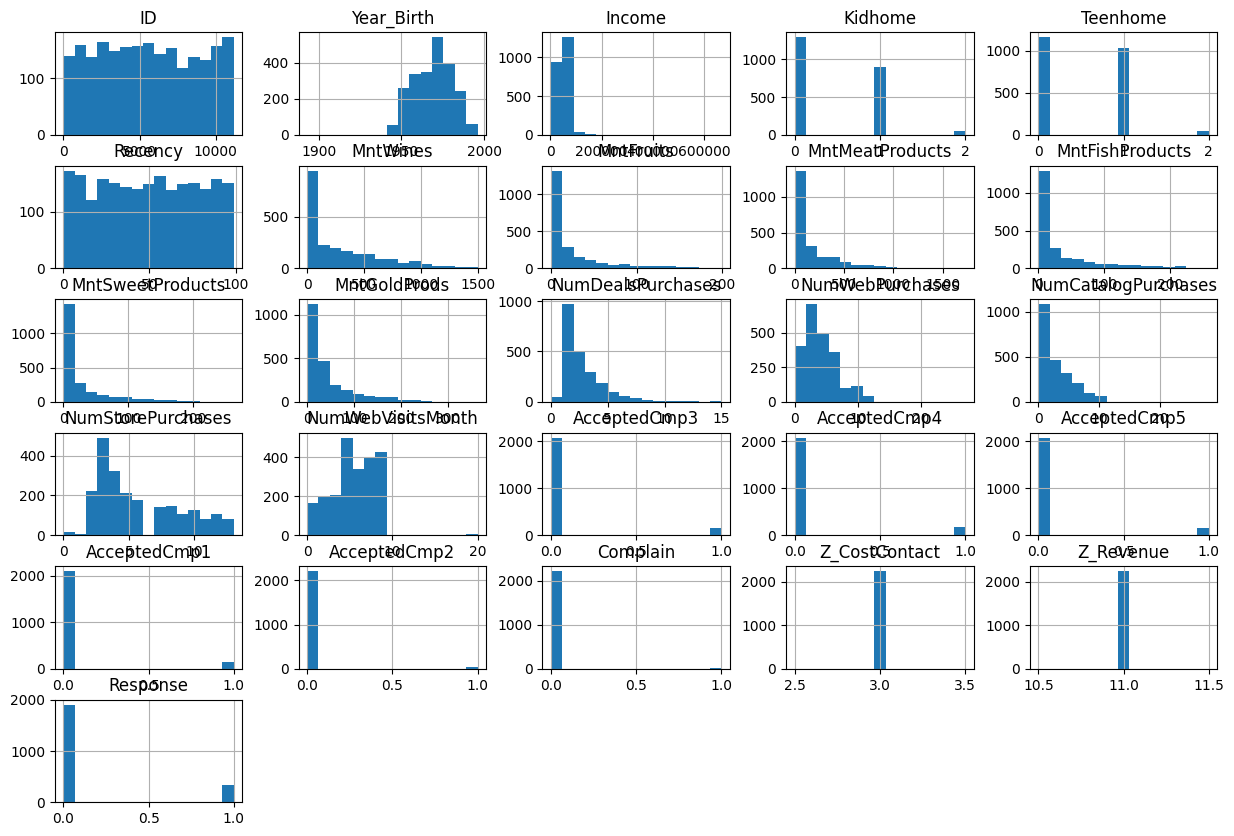

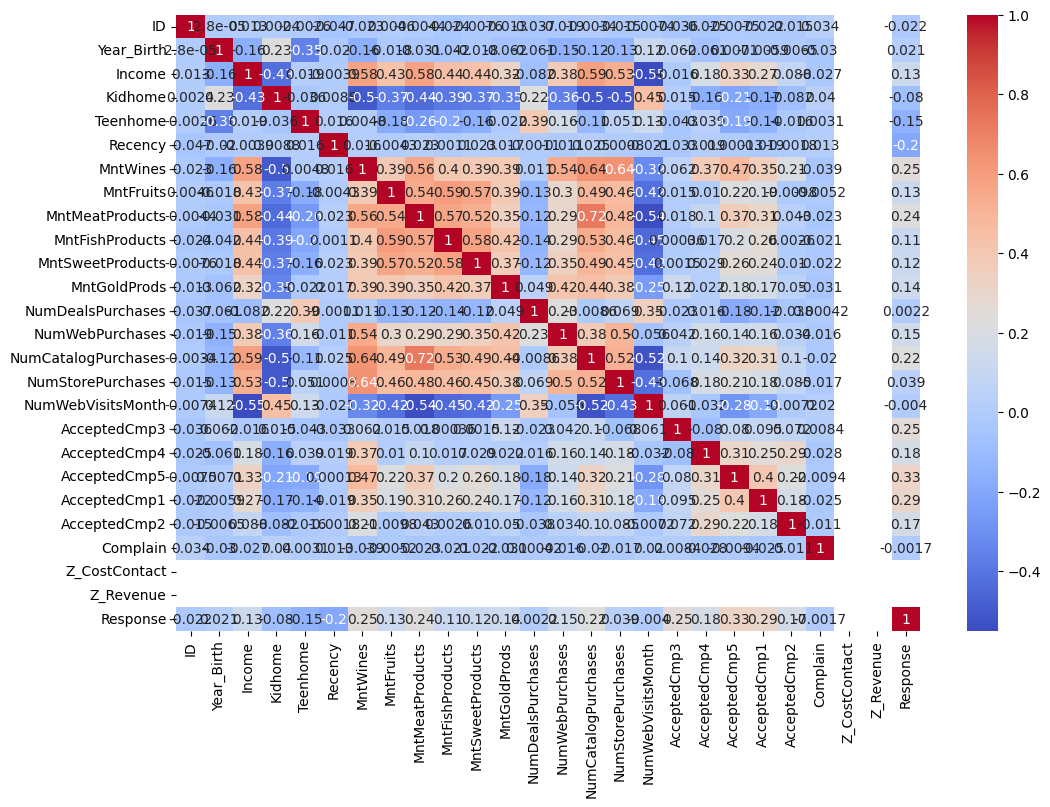

In [56]:
# Memahami struktur data
print(data.info())

# Menangani data yang hilang
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Mengisi nilai yang hilang dengan mean
imputer = SimpleImputer(strategy='mean')
data['Income'] = imputer.fit_transform(data[['Income']])

# Analisis distribusi dan korelasi
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns].describe()

# Visualisasi distribusi variabel numerik
data[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.show()

# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [57]:
# Menghapus data duplikat
data = data.drop_duplicates()

# Normalisasi fitur numerik
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Encoding data kategorikal
data = pd.get_dummies(data, drop_first=True)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering dengan PCA**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [58]:
# Menggunakan PCA untuk mengurangi dimensi data
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Menggunakan K-Means untuk clustering dengan data PCA
kmeans_pca = KMeans(n_clusters=5, random_state=42)
data['Cluster_PCA'] = kmeans_pca.fit_predict(data_pca)

# Menggunakan Silhouette Score untuk evaluasi
silhouette_avg_pca = silhouette_score(data_pca, data['Cluster_PCA'])
print(f'Silhouette Score dengan PCA: {silhouette_avg_pca}')

# Mengevaluasi apakah Silhouette Score mencapai minimal 0.60
if silhouette_avg_pca < 0.60:
    print("Silhouette Score kurang dari 0.60, mencoba jumlah cluster yang berbeda dengan PCA.")
    best_score_pca = silhouette_avg_pca
    best_k_pca = 5
    for n_clusters in range(2, 11):
        kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels_pca = kmeans_pca.fit_predict(data_pca)
        silhouette_avg_pca = silhouette_score(data_pca, cluster_labels_pca)
        print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {silhouette_avg_pca}')
        if silhouette_avg_pca > best_score_pca:
            best_score_pca = silhouette_avg_pca
            best_k_pca = n_clusters
    print(f'Jumlah cluster optimal dengan PCA: {best_k_pca}, dengan Silhouette Score: {best_score_pca}')
    kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)
    data['Cluster_PCA'] = kmeans_pca.fit_predict(data_pca)
else:
    print("Silhouette Score mencapai minimal 0.60 dengan PCA.")

Silhouette Score dengan PCA: 0.4006619792034835
Silhouette Score kurang dari 0.60, mencoba jumlah cluster yang berbeda dengan PCA.
Jumlah Cluster: 2, Silhouette Score: 0.5284903068843073
Jumlah Cluster: 3, Silhouette Score: 0.5108766675284584
Jumlah Cluster: 4, Silhouette Score: 0.451963911131125
Jumlah Cluster: 5, Silhouette Score: 0.4006619792034835
Jumlah Cluster: 6, Silhouette Score: 0.3893692169789415
Jumlah Cluster: 7, Silhouette Score: 0.39267172323967486
Jumlah Cluster: 8, Silhouette Score: 0.3921907627363677
Jumlah Cluster: 9, Silhouette Score: 0.3823868743851018
Jumlah Cluster: 10, Silhouette Score: 0.36640667200258853
Jumlah cluster optimal dengan PCA: 2, dengan Silhouette Score: 0.5284903068843073


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [59]:
# Inisialisasi KMeans dengan jumlah cluster awal
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Menggunakan Silhouette Score untuk evaluasi
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Mengevaluasi apakah Silhouette Score mencapai minimal 0.60
if silhouette_avg < 0.60:
    print("Silhouette Score kurang dari 0.60, mencoba jumlah cluster yang berbeda.")
    best_score = silhouette_avg
    best_k = 5
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {silhouette_avg}')
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_k = n_clusters
    print(f'Jumlah cluster optimal: {best_k}, dengan Silhouette Score: {best_score}')
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
else:
    print("Silhouette Score mencapai minimal 0.60.")

Silhouette Score: 0.10477489027534155
Silhouette Score kurang dari 0.60, mencoba jumlah cluster yang berbeda.
Jumlah Cluster: 2, Silhouette Score: 0.2532170711223931
Jumlah Cluster: 3, Silhouette Score: 0.22408725138625613
Jumlah Cluster: 4, Silhouette Score: 0.17985246915340528
Jumlah Cluster: 5, Silhouette Score: 0.10477489027534155
Jumlah Cluster: 6, Silhouette Score: 0.09214217312240304
Jumlah Cluster: 7, Silhouette Score: 0.09879740104051152
Jumlah Cluster: 8, Silhouette Score: 0.104961292685337
Jumlah Cluster: 9, Silhouette Score: 0.11291013710364066
Jumlah Cluster: 10, Silhouette Score: 0.12462572397417421
Jumlah cluster optimal: 2, dengan Silhouette Score: 0.2532170711223931


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Menggunakan SelectKBest untuk feature selection
selector = SelectKBest(score_func=f_classif, k=10)
data_selected = selector.fit_transform(data_scaled, data['Cluster'])

# Menggunakan PCA untuk mengurangi dimensi data
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_selected)

# Menggunakan K-Means untuk clustering dengan data PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42)
data['Cluster_PCA_FS'] = kmeans_pca.fit_predict(data_pca)

# Menggunakan Silhouette Score untuk evaluasi
silhouette_avg_pca_fs = silhouette_score(data_pca, data['Cluster_PCA_FS'])
print(f'Silhouette Score dengan PCA dan Feature Selection: {silhouette_avg_pca_fs}')

# Mengevaluasi apakah Silhouette Score mencapai minimal 0.60
if silhouette_avg_pca_fs < 0.60:
    print("Silhouette Score kurang dari 0.60, mencoba jumlah cluster yang berbeda dengan PCA dan Feature Selection.")
    best_score_pca_fs = silhouette_avg_pca_fs
    best_k_pca_fs = 2
    for n_clusters in range(2, 11):
        kmeans_pca_fs = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels_pca_fs = kmeans_pca_fs.fit_predict(data_pca)
        silhouette_avg_pca_fs = silhouette_score(data_pca, cluster_labels_pca_fs)
        print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {silhouette_avg_pca_fs}')
        if silhouette_avg_pca_fs > best_score_pca_fs:
            best_score_pca_fs = silhouette_avg_pca_fs
            best_k_pca_fs = n_clusters
    print(f'Jumlah cluster optimal dengan PCA dan Feature Selection: {best_k_pca_fs}, dengan Silhouette Score: {best_score_pca_fs}')
    kmeans_pca_fs = KMeans(n_clusters=best_k_pca_fs, random_state=42)
    data['Cluster_PCA_FS'] = kmeans_pca_fs.fit_predict(data_pca)
else:
    print("Silhouette Score mencapai minimal 0.60 dengan PCA dan Feature Selection.")

Silhouette Score dengan PCA dan Feature Selection: 0.5989844817050929
Silhouette Score kurang dari 0.60, mencoba jumlah cluster yang berbeda dengan PCA dan Feature Selection.


/home/yoga/.asdf/installs/python/anaconda3-2024.06-1/envs/main-ds/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/yoga/.asdf/installs/python/anaconda3-2024.06-1/envs/main-ds/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Jumlah Cluster: 2, Silhouette Score: 0.5989844817050929


Jumlah Cluster: 3, Silhouette Score: 0.5393812492104639
Jumlah Cluster: 4, Silhouette Score: 0.4918100516932646
Jumlah Cluster: 5, Silhouette Score: 0.4526912204573719
Jumlah Cluster: 6, Silhouette Score: 0.4693365106689961
Jumlah Cluster: 7, Silhouette Score: 0.4524529504890088
Jumlah Cluster: 8, Silhouette Score: 0.4468977807871039
Jumlah Cluster: 9, Silhouette Score: 0.4352225118610014
Jumlah Cluster: 10, Silhouette Score: 0.4226119556985844
Jumlah cluster optimal dengan PCA dan Feature Selection: 2, dengan Silhouette Score: 0.5989844817050929


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

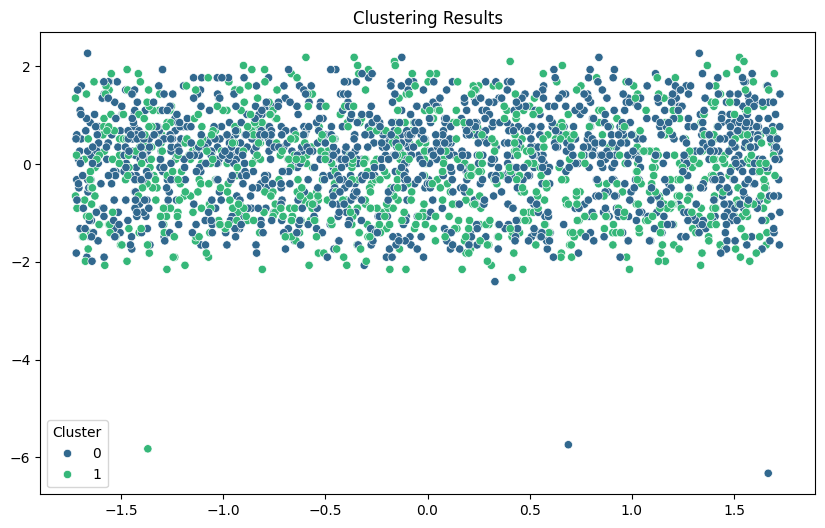

In [61]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Clustering Results')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

                         ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster_PCA_FS                                                               
0               5570.604412  1969.911029  39155.013436  0.689706  0.561029   
1               5625.472727  1967.097727  72480.709954  0.064773  0.421591   

                  Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster_PCA_FS                                                      
0               48.963971  114.606618   6.327941        38.047794   
1               49.334091  596.535227  57.171591       366.162500   

                MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
Cluster_PCA_FS                   ...                                    
0                      9.472059  ...           6.460294      0.069118   
1                     80.880682  ...           3.548864      0.078409   

                AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Cluster_PCA_FS                             

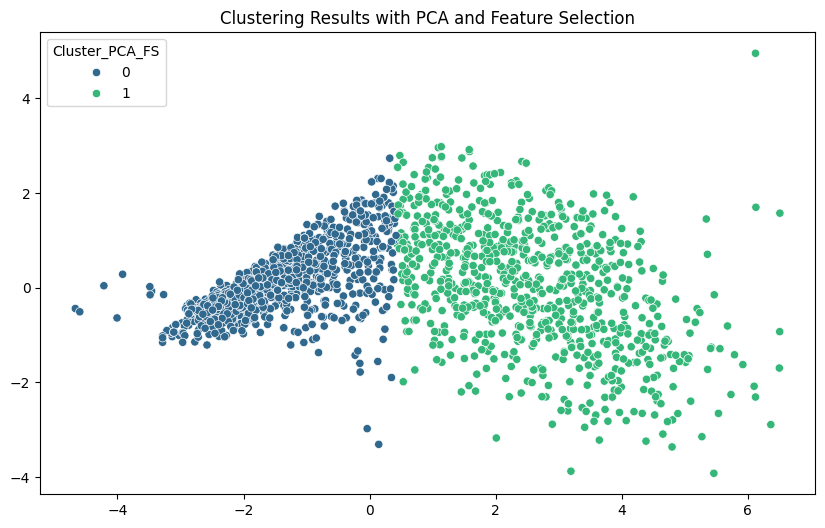

In [ ]:
# Analisis karakteristik tiap cluster
cluster_summary_pca_fs = data.groupby('Cluster_PCA_FS')[numeric_columns].mean()
print(cluster_summary_pca_fs)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Cluster_PCA_FS'], palette='viridis')
plt.title('Clustering Results with PCA and Feature Selection')
plt.show()

# Interpretasi hasil clustering

## Cluster 0: 
  - Pelanggan dengan pendapatan menengah (sekitar 39,155) dan pengeluaran rendah pada produk anggur (sekitar 114).
  - Memiliki rata-rata jumlah anak kecil (Kidhome) sekitar 0.69 dan remaja (Teenhome) sekitar 0.56.
  - Rata-rata pengeluaran pada produk daging (Meat Products) sekitar 38 dan produk ikan (Fish Products) sekitar 9.
  - Rata-rata jumlah kunjungan web per bulan sekitar 6.46.
  - Tingkat keluhan (Complain) sekitar 1%.
  - Rata-rata tingkat respons terhadap kampanye sekitar 10%.

## Cluster 1: 
  - Pelanggan dengan pendapatan tinggi (sekitar 72,480) dan pengeluaran tinggi pada produk anggur (sekitar 596).
  - Memiliki rata-rata jumlah anak kecil (Kidhome) sekitar 0.06 dan remaja (Teenhome) sekitar 0.42.
  - Rata-rata pengeluaran pada produk daging (Meat Products) sekitar 366 dan produk ikan (Fish Products) sekitar 80.
  - Rata-rata jumlah kunjungan web per bulan sekitar 3.55.
  - Tingkat keluhan (Complain) sekitar 0.8%.
  - Rata-rata tingkat respons terhadap kampanye sekitar 22%.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
# Mengeksport hasil clustering ke dalam file CSV
data.to_csv('marketing_campaign_with_clusters.csv', index=False)